# PROJECT-PRCP-1003


## Ecommerce Purchases Data Analysis


The situation is, customers are providing some personal information while purchasing stuff on-line or in-store. For some reasons, your client wants to know the answer to some of his questions from the dataset, let's try to help for them.


The following insights are expected from this project:

1   How many entries your data have? Can you tell the no. of columns in your data?
    get the basic statistics of all the columns, count the unique data present in each feature
2.	Perform Univariate analysis and multi variate analysis using plots
3.	Check with the null values of the features and handle it appropriately
4.	Check for the normality of the data using histogram
5.	Perform imputation by checking the IQR and remove outliers if any
6.	What are the three most common customer's names?
7.	How many male customers have 'Structural Engineer' as profession?
8.	Any customers have the same phone number, can you find those customers?
9.	As a loyalty reward, company wants to send thanks coupon to those who spent 100CAD or more, please find out the customers?
10.	Can you tell the top 5 most popular email providers? (e.g. gmail.com, yahoo.com, etc...)
11	Is there any customer who is using email with "am.edu"?
12	Which day of the week, the store gets more customers?
13  What are two most common professions?


In [28]:
## Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [29]:
## Importing data
data=pd.read_csv(r'C:\Users\Pratyaksh Kukreja\Downloads\office python\Team-3\Team-3\Cust_Purch_FakeData.csv')

In [30]:
data.head()

,prefix,first,last,email,gender,age,company,profession,phone,postal,province,cc_no,cc_exp,cc_type,price(CAD),fav_color,ip,weekday,ampm,date
0,Dr.,Ray,Morton,sebvajom@kol.km,Male,38,Medtronic Inc.,Health Therapist,(987) 619-2695,B6V 3W3,MB,5.020000e+15,May-18,Solo,8.36,Blue,126.23.139.2,Sunday,pm,04-05-1930
1,Miss,Claudia,Rodriquez,acu@jatsot.ug,Female,51,"Ames Department Stores, Inc.",Health Therapist,(356) 736-7352,G7M 5F3,SK,5.020000e+15,Jul-28,Visa,68.31,Black,106.198.76.211,Tuesday,am,12/20/1926
2,Miss,Harry,Meyer,zuz@lo.wf,Female,51,CSX Corp.,Political Scientist,(539) 246-1806,A0Z 6P9,NS,6.300000e+15,Feb-23,Switch,34.65,Black,186.150.187.29,Wednesday,pm,08/20/1931
3,Miss,Edith,Gilbert,hansohsi@jupec.md,Female,55,Murphy Oil Corporation,Transportation Manager,(984) 962-7494,P9I 9H3,YT,3.530000e+15,Feb-28,Maestro,64.59,White,80.140.57.161,Saturday,am,06/18/2001
4,Dr.,Lura,Murphy,webediti@je.st,Female,20,PETsMART Inc,Statistician,(902) 568-9748,S1A 6K0,ON,4.030000e+15,Oct-25,Diners Club International,20.83,Yellow,211.103.43.41,Friday,pm,06/14/2045


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   prefix      30000 non-null  object 
 1   first       30000 non-null  object 
 2   last        30000 non-null  object 
 3   email       30000 non-null  object 
 4   gender      29997 non-null  object 
 5   age         30000 non-null  int64  
 6   company     30000 non-null  object 
 7   profession  30000 non-null  object 
 8   phone       30000 non-null  object 
 9   postal      30000 non-null  object 
 10  province    29998 non-null  object 
 11  cc_no       30000 non-null  float64
 12  cc_exp      30000 non-null  object 
 13  cc_type     30000 non-null  object 
 14  price(CAD)  29995 non-null  object 
 15  fav_color   30000 non-null  object 
 16  ip          30000 non-null  object 
 17  weekday     30000 non-null  object 
 18  ampm        30000 non-null  object 
 19  date        30000 non-nul

# Handling Null Values

In [32]:
data.isnull().sum()

prefix        0
first         0
last          0
email         0
gender        3
age           0
company       0
profession    0
phone         0
postal        0
province      2
cc_no         0
cc_exp        0
cc_type       0
price(CAD)    5
fav_color     0
ip            0
weekday       0
ampm          0
date          0
dtype: int64

In [55]:
data.gender.replace(to_replace='?',value=np.nan,inplace=True)
data['gender'].fillna(data['gender'].mode()[0],inplace=True)
data['gender']=data['gender'].astype('object')

data.province.replace(to_replace='?',value=np.nan,inplace=True)
data['province'].fillna(data['province'].mode()[0],inplace=True)

data['price(CAD)'].replace(to_replace='?',value=np.nan,inplace=True)
data['price(CAD)'].fillna(data['price(CAD)'].mode()[0],inplace=True)

In [56]:
data.isnull().sum()

prefix        0
first         0
last          0
email         0
gender        0
age           0
company       0
profession    0
phone         0
postal        0
province      0
cc_no         0
cc_exp        0
cc_type       0
price(CAD)    0
fav_color     0
ip            0
weekday       0
ampm          0
date          0
dtype: int64

In [57]:
data["price(CAD)"].value_counts()

83.21    19
63.41    11
97.61    10
27.39    10
8.85     10
         ..
9.35      1
88.54     1
76.46     1
98.65     1
39.28     1
Name: price(CAD), Length: 9511, dtype: int64

In [58]:
data[["price(CAD)"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   price(CAD)  30000 non-null  object
dtypes: object(1)
memory usage: 234.5+ KB


In [66]:
data["price(CAD)"] = pd.to_numeric(data["price(CAD)"], downcast="float")
data["cc_no"]= data["cc_no"].astype(str)

In [67]:
data.describe()

,age,price(CAD)
count,30000.000000,30000.000000
mean,41.550067,49.997635
std,13.839073,28.769077
min,18.000000,0.000000
25%,30.000000,25.350000
50%,42.000000,49.980000
75%,53.000000,74.959999
max,65.000000,100.000000


In [68]:
data.describe(include=[object])

,prefix,first,last,email,gender,company,profession,phone,postal,province,cc_no,cc_exp,cc_type,fav_color,ip,weekday,ampm,date
count,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000
unique,4,497,500,28955,2,947,389,29999,29960,13,169,130,17,6,29999,7,2,23789
top,Mrs.,Willie,Byrd,me@outlook.com,Female,Trinity Industries Inc,Preschool Teacher,(263) 382-8004,X5Z 4E1,ON,6300000000000000.0,Apr-18,Solo,White,64.136.159.51,Saturday,am,10/18/2068
freq,7676,130,94,8,15148,51,112,2,2,2375,1929,293,1867,5080,2,4376,15031,5


In [69]:
# Number of unique data present in each feature
for column in data:
    print('Unique Values in ',column,' are',data[column].nunique(),' and unique values are:',data[column].unique(),'\n')

Unique Values in  prefix  are 4  and unique values are: ['Dr.' 'Miss' 'Mrs.' 'Mr.'] 

Unique Values in  first  are 497  and unique values are: ['Ray' 'Claudia' 'Harry' 'Edith' 'Lura' 'Andre' 'Cody' 'Cory' 'Dorothy'
 'Rose' 'Ada' 'Rodney' 'Antonio' 'Lucinda' 'Jared' 'Lilly' 'Peter' 'Maud'
 'Warren' 'Viola' 'Leona' 'Henrietta' 'Duane' 'Winnie' 'Cecilia' 'Michael'
 'Lydia' 'Katherine' 'Ruth' 'Ricardo' 'Carl' 'Loretta' 'Phoebe'
 'Christina' 'Ronald' 'Lily' 'Ralph' 'Marion' 'Nelle' 'Ethan' 'Leon'
 'Winifred' 'Carolyn' 'Elva' 'Cornelia' 'Virgie' 'Calvin' 'Cordelia'
 'Lillian' 'Francis' 'Linnie' 'Christian' 'Corey' 'Amelia' 'Roger' 'Blake'
 'Bryan' 'Troy' 'Rosalie' 'Esther' 'Theodore' 'Leila' 'Charlie'
 'Elizabeth' 'Joel' 'Jeremiah' 'Alice' 'Vera' 'Andrew' 'Jeremy' 'Gregory'
 'Lelia' 'Barbara' 'Allen' 'Willie' 'Luke' 'Francisco' 'Annie' 'Miguel'
 'Rebecca' 'Darrell' 'Emilie' 'Austin' 'Florence' 'Timothy' 'Jerry' 'Dora'
 'Anthony' 'Flora' 'Mason' 'Charlotte' 'Tyler' 'Cora' 'Amanda' 'Eunice'
 '

#2a Univariate Analysis


In [70]:
# Create a new Df with only numeric datatypes
Ndata=data.select_dtypes(exclude=['object']) 
Ndata.shape

(30000, 2)

In [71]:
Ndata.columns

Index(['age', 'price(CAD)'], dtype='object')

C:\Users\Pratyaksh Kukreja\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


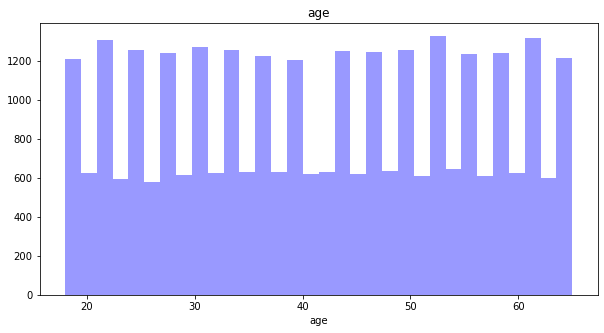

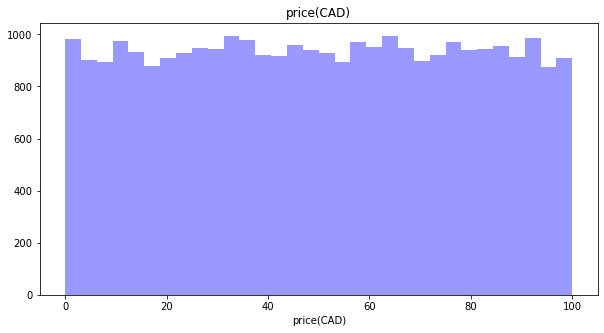

In [72]:
# Plotting age using distplot
for column in Ndata:
    plt.figure(figsize=(10,5))
    sns.distplot(Ndata[column].dropna(),color='blue',kde=False)
    plt.title(column)
    plt.show()

In [74]:
# DF with object dtypes except ip
Ddata=data.select_dtypes(include=['object']) 
Ddata=Ddata.drop(['ip','first','last', 'email','phone','cc_exp','company', 'profession', 'postal','date','cc_no' ],axis=1)
Ddata.columns

Index(['prefix', 'gender', 'province', 'cc_type', 'fav_color', 'weekday',
       'ampm'],
      dtype='object')

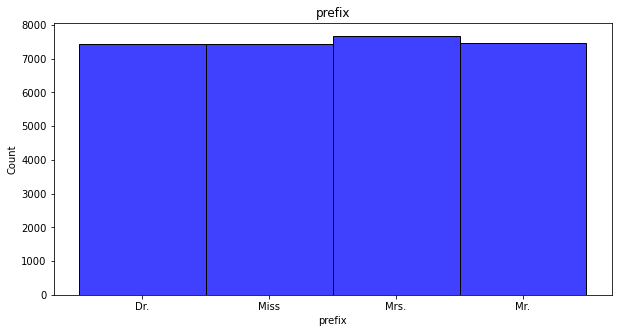

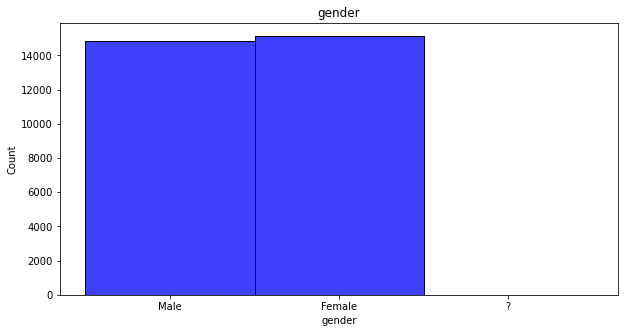

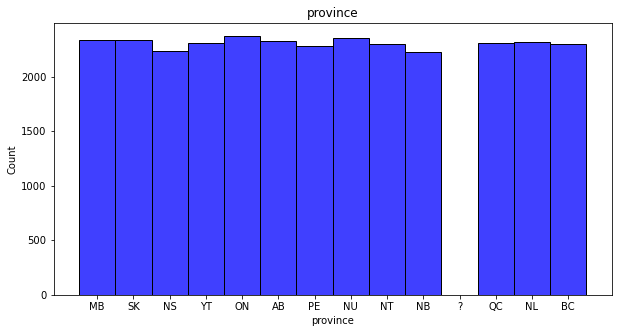

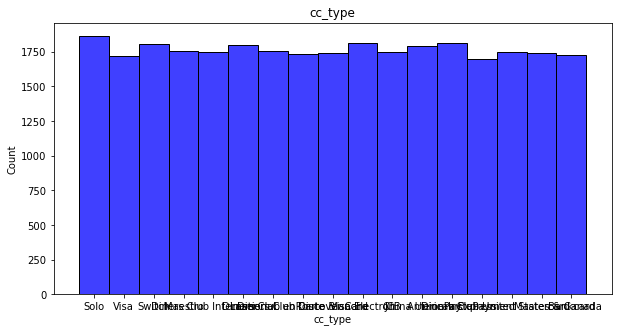

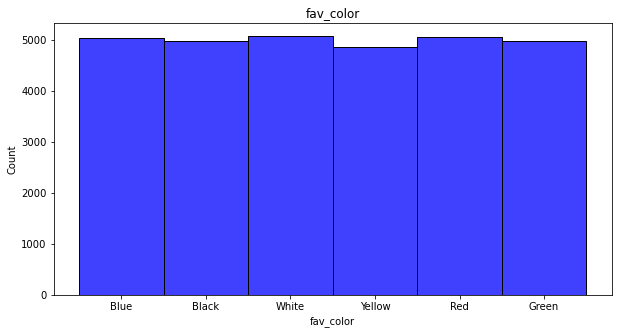

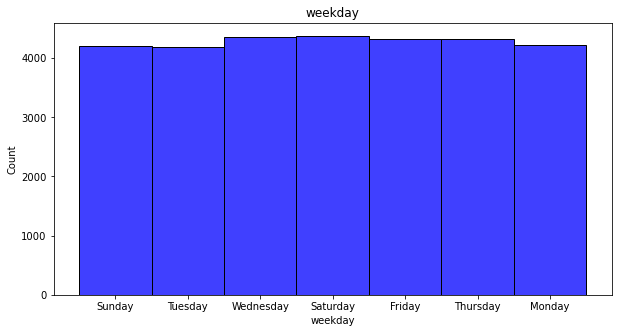

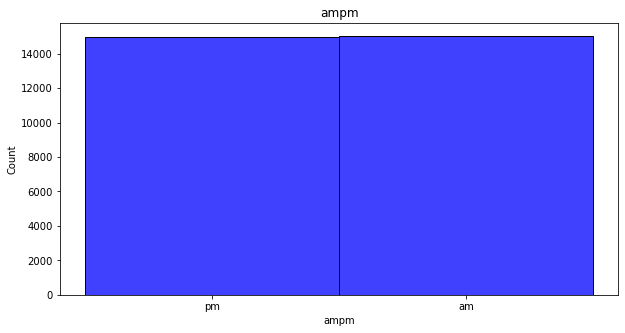

In [14]:
# Plotting different features using distplot
for column in Ddata:
    plt.figure(figsize=(10,5))
    sns.histplot(Ddata[column].dropna(),color='blue',kde=False)
    plt.title(column)
    plt.show()

#3b MultiVariate Analysis

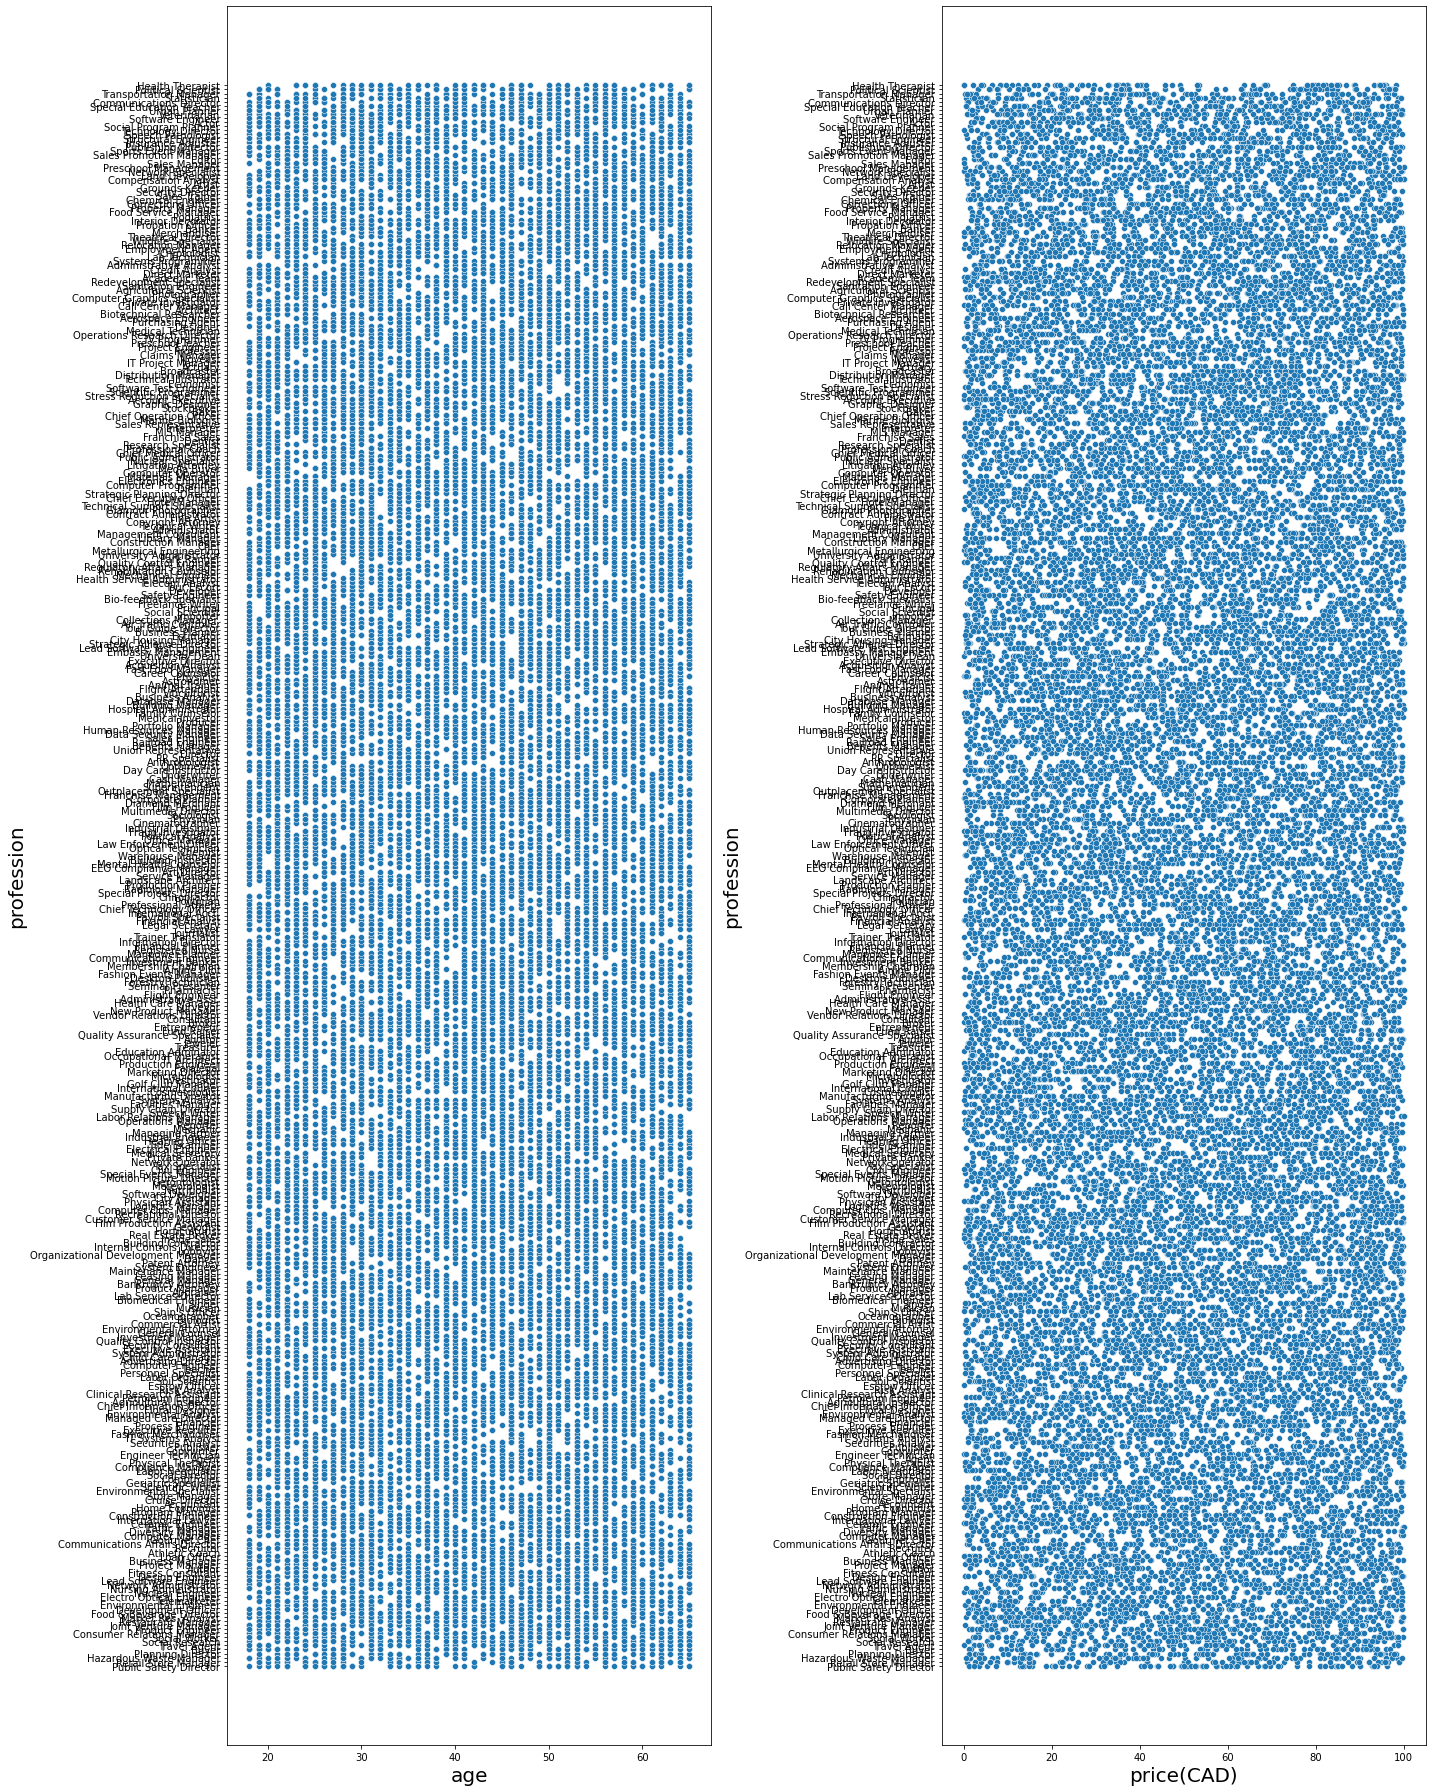

In [81]:
# Plotting scatter plot between numeric datatypes against profession
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in Ndata:
    if plotnumber<=2 :
        ax =plt.subplot(1,2,plotnumber)
        sns.scatterplot(x=Ndata[column].dropna(axis=0)
                        ,y=data.profession)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('profession',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [83]:
for column in Ndata:
    print (data[column])
    a,b=stats.normaltest(data[[column]])
    print(a,b)
    if b<alpha:
        print('yes')
    else:
        print('ok')    
        

0        38
1        51
2        51
3        55
4        20
         ..
29995    38
29996    24
29997    56
29998    64
29999    22
Name: age, Length: 30000, dtype: int64


NameError: name 'stats' is not defined